# Basic structural analysis functionality

In [1]:
%matplotlib notebook
import sys
import csv
sys.path.append("faultdiagnosistoolbox/build/lib.macosx-10.6-x86_64-2.7/")
import numpy as np
import scipy.sparse as sp
import structuralanalysis as sa
import faultdiagnosistoolbox.dmperm as dmperm
dir(sa)

['__doc__', '__file__', '__name__', '__package__', 'dmperm_internal']

## Some basic helper functions

In [2]:
def ReadMatrixCSV(fileName):
    with open(fileName, 'rt') as csvfile:
        matReader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        size = matReader.next() # Assume first line contains size information
        X=np.zeros((int(size[0]),int(size[1])),dtype='float64');
        for edge in matReader:
            X[int(edge[0]),int(edge[1])] = float(edge[2])
        return sp.csc_matrix(X.astype(np.int64))

## Low level function calls

In [3]:
X=ReadMatrixCSV('Xengine.txt')
foo=sa.dmperm_internal(dmperm.CSCDict(X))

In [4]:
print foo["p"]

[ 83  85  88  87 131 120 121 123 122 124 132 138 133 139 140 134 135  82
  84  86 136 137   0   1  11   2   3   4   5   6   7   8   9  10  12  13
  14  17  15  16  18  19  20  23  21  22  24  66  29  25  34  30  26  27
  28  31  45  32  33  37  38  35  36  39  57  40  41  42  43  44  51  46
  50  48  49  47  53  52  54  56  55  58  59  60  67  68  61  65  62  63
  64  69  70  72  71  73  74  79  75  76  77  78  80  81  89  90  93  91
  92  94  97 101  95  98  96 100  99 102 103 105 113 104 106 110 111 109
 107 108 112 114 115 118 116 119 235 125 128 126 129 130 141 145 143 142
 144 149 171 146 148 160 147 150 152 151 155 154 153 156 159 158 157 164
 165 166 161 162 163 167 168 210 169 170 172 173 174 175 198 176 192 177
 204 178 184 181 179 180 182 183 185 186 187 189 190 188 191 194 195 193
 196 197 201 203 200 199 202 206 205 207 208 209 211 212 213 214 215 216
 218 217 224 223 220 219 221 244 222 226 225 227 228 229 233 230 231 232
 234 236 238 239 237 240 249 241 242 243 245 246 27

In [5]:
import matplotlib
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


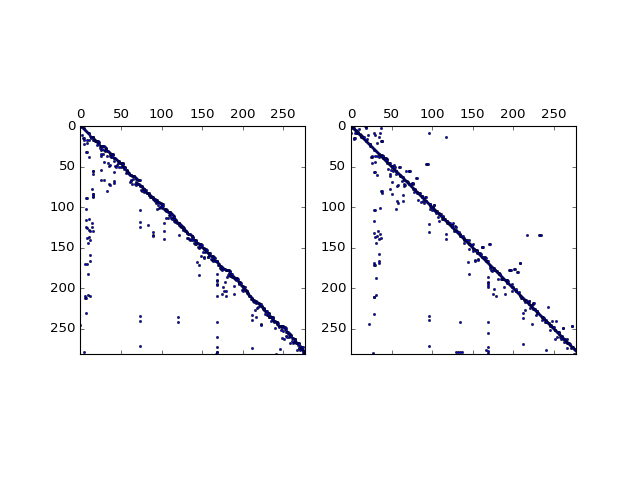

In [6]:
plt.figure(1)
plt.subplot(1,2,1)
plt.spy(X, marker="o", markersize=2);
plt.subplot(1,2,2)
plt.spy(X[foo["p"],:][:,foo["q"]], marker="o", markersize=2);

## Try some functionality 

In [7]:
dir(dmperm)

['CSCDict',
 'DMResult',
 'EqBlock',
 'GetDMParts',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 'dmperm',
 'np',
 'sa',
 'safedmperm',
 'sp',
 'sprank']

In [9]:
reload(dmperm);

In [10]:
dm=dmperm.GetDMParts(X)
dmperm.sprank(X)

278

Evaluate timing performance by dooing 1000 dmperm 

Matlab comparisson (my iMac):
tic; for k=1:1000; GetDMParts(X); end; toc
Elapsed time is 0.108608 seconds.


In [11]:
import timeit
timeit.timeit('dmperm.GetDMParts(X)', setup="from __main__ import dmperm, X",number=1000)

0.10198688507080078

In [ ]:
import faultdiagnosistoolbox as fdt

In [ ]:
print fdt.IsPSO(X)
print fdt.IsPSO(X[dm.Mp.row,:][:,dm.Mp.col])